In [43]:
import pandas as pd

In [206]:
passengers = pd.read_csv('./data/titanic_kaggle_train.csv')
passengers
# https://www.kaggle.com/competitions/titanic/data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Q_A: What types of data we know about passangers? How are they distributed?
A_A: There are 891 passnagers, we know a 12 different things about each passenger. Numeric values like Age (mean 30) and Fare, but also some categorical information like their passanger class (spans between 1 and 3).

In [70]:
# visualisations:
print("Column names and their types:")
passengers.info()


Column names and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
passengers.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [63]:
passengers.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [68]:
passengers.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [67]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
passengers.Pclass.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Pclass, Length: 891, dtype: bool

# Question B

**Q: How are Age and Fare distriubuted?**

A: Age was distrinuted between 0 and 80, with mean of 29.7. Data seems to be rigth-skewed, with some underaged travellers. There seems to be a large group of children, but only those bewlo 1 year old have age detailed in months. Fare has a mean of 32, with ope passanger paying 512, and 14 of them paying 0. Some of the 0 fare payers were emloyees. Tickets of class 1 seemed most expensive (avg 84 $), than class 2 (21 $) and 3 (14 $).

In [71]:
passengers.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

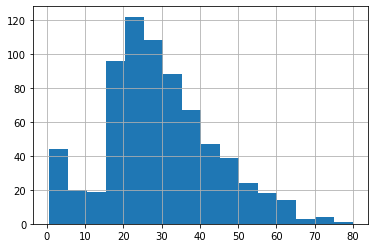

In [89]:
passengers.Age.hist(bins=16)

<AxesSubplot:>

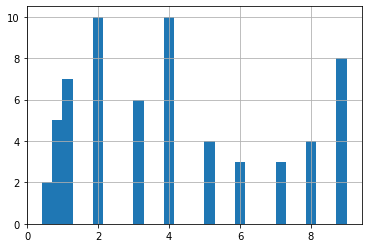

In [97]:
passengers[ passengers.Age < 10  ].Age.hist(bins=30)

In [93]:
passengers[ (passengers.Age > 1) & (passengers.Age <=2) ].PassengerId.count()

10

In [77]:
passengers.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
passengers.Fare.hist(bins=50)

In [ ]:
passengers[ passengers.Pclass == 1 ].Fare.hist(bins=10)

In [ ]:
passengers[ passengers.Pclass == 2 ].Fare.hist(bins=10)

In [ ]:
passengers[ passengers.Pclass == 3 ].Fare.hist(bins=10)

In [ ]:
import matplotlib.pyplot as plt
Fig, axs = plt.subplots(3,1)
passengers[ passengers.Pclass == 1 ].Fare.hist(bins=10, ax = axs[0])
passengers[ passengers.Pclass == 2 ].Fare.hist(bins=10, ax = axs[1])
passengers[ passengers.Pclass == 3 ].Fare.hist(bins=10, ax = axs[2])

In [108]:
passengers.groupby(by="Pclass").Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [85]:
passengers[    passengers.Fare == 0   ].PassengerId.count()

15

# Question C:

Q: when we group passangers, what can we see abotu survival and fares?
A: Lookking at pasaanger class, peo-ple with better class tickets survived more (62% for class 1, with mean of all passangers being 38%). Peoiple with 3rd class tickets seemed to be younger and more likely to travel alone. 60% of the travellers travelled alone. Largest group had 11 people.

In [ ]:
passengers.Survived.mean()

In [155]:
# passengers[ passengers.Sex == 'male' ].Survived.value_counts().plot( kind = 'barh')
# passengers[ passengers.Sex == 'female' ].Survived.value_counts().plot( kind = 'barh')

In [157]:
passengers.groupby(by=[ "Sex", "Pclass"]).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [111]:
passengers.groupby(by="Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [146]:
passengers[ passengers.Age < 18 ].groupby(by="Survived").mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,GroupSize
Survived,,,,,,,
0,414.865385,2.923077,10.394231,2.269231,1.076923,26.95489,4.346154
1,441.442623,2.295082,7.888033,0.770492,1.032787,34.85731,2.803279


In [149]:
passengers['GroupSize'] = passengers.apply( lambda row: row.SibSp + row.Parch + 1, axis=1)

In [150]:
def group_size(row):
    return row.SibSp + row.Parch + 1

passengers['GroupSize'] = passengers.apply(group_size,  axis=1)

In [148]:
passengers.groupby(by='GroupSize').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
GroupSize,,,,,,,,,,,,
1,537,537,537,537,537,404,537,537,537,537,94,535
2,161,161,161,161,161,139,161,161,161,161,66,161
3,102,102,102,102,102,93,102,102,102,102,29,102
4,29,29,29,29,29,27,29,29,29,29,9,29
5,15,15,15,15,15,11,15,15,15,15,2,15
6,22,22,22,22,22,22,22,22,22,22,4,22
7,12,12,12,12,12,12,12,12,12,12,0,12
8,6,6,6,6,6,6,6,6,6,6,0,6
11,7,7,7,7,7,0,7,7,7,7,0,7


In [131]:
type(passengers)

pandas.core.frame.DataFrame

In [132]:
type(passengers.Age)

pandas.core.series.Series

In [151]:
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GroupSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


# question D

are variables correlating?

In [162]:
passengers.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,GroupSize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
GroupSize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [167]:
passengers.isnull().Age.mean()

0.19865319865319866

In [ ]:
passengers[ passengers.Age.isnull() ]

In [172]:
passengers.Age.fillna(value = passengers.Age.mean() )

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GroupSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Question E

Q: Can we use simple Machine learning to fill in miossing data (eg. Age)
A: (this was just an experiment) After turning the categorical values into numbers, we used Linear Regression to predict Age.

In [ ]:
from sklearn.linear_model import LinearRegression

In [224]:
passengers[ passengers.Embarked.isnull()]

passengersCat.Embarked.value_counts()

1.0    644
0.0    168
2.0     77
3.0      2
Name: Embarked, dtype: int64

In [225]:
# make categorical variables actually categorical
passengersCat = passengers.copy()
passengersCat.Sex = passengersCat.Sex.map({'male':0, 'female':1})
passengersCat.Embarked = passengersCat.Embarked.map({'C':0, 'S':1, 'Q':2}).fillna(3)
passengersCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [228]:
lr  = LinearRegression()

passWithAge = passengersCat[ passengersCat.Age.isnull() == False ].copy()
passWithoutAge = passengersCat[ passengersCat.Age.isnull() == True ].copy()

train_x = passWithAge[ ['Pclass', 'Sex', 'Fare', 'Embarked', 'PassengerId'] ]
train_y = passWithAge.Age

lr.fit( train_x, train_y )

test_x = passWithoutAge[ ['Pclass', 'Sex', 'Fare', 'Embarked', 'PassengerId']]

test_y = lr.predict(test_x)
passWithoutAge.Age = test_y.round(0)

In [229]:
passWithoutAge.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,34.0,0,0,244373,13.0000,NaN,1.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,19.0,0,0,2649,7.2250,NaN,0.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,24.0,0,0,2631,7.2250,NaN,0.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,23.0,0,0,330959,7.8792,NaN,2.0
29,30,0,3,"Todoroff, Mr. Lalio",0,26.0,0,0,349216,7.8958,NaN,1.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,31.0,1,0,PC 17569,146.5208,B78,0.0
32,33,1,3,"Glynn, Miss. Mary Agatha",1,23.0,0,0,335677,7.7500,NaN,2.0
36,37,1,3,"Mamee, Mr. Hanna",0,24.0,0,0,2677,7.2292,NaN,0.0
42,43,0,3,"Kraeff, Mr. Theodor",0,24.0,0,0,349253,7.8958,NaN,0.0
